In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [2]:
df1 = pd.read_csv('anneal.data.csv')

In [3]:
df1

,?,C,A,08,00,?.1,S,?.2,000,?.3,...,?.22,?.23,COIL,0.700,0610.0,0000,?.24,0000.1,?.25,3
0,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
2,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
4,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,1.600,610.0,0,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
793,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
794,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


In [4]:
df = pd.DataFrame(df1,columns =["COIL","0.700","0610.0","0000","3"])

In [5]:
df

,COIL,0.700,0610.0,0000,3
0,COIL,3.200,610.0,0,3
1,SHEET,0.700,1300.0,762,3
2,COIL,2.801,385.1,0,3
3,SHEET,0.801,255.0,269,3
4,COIL,1.600,610.0,0,3
...,...,...,...,...,...
792,COIL,1.001,50.0,0,3
793,SHEET,0.699,1300.0,4880,3
794,COIL,0.400,609.9,0,3
795,SHEET,3.200,610.0,4880,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   COIL    797 non-null    object 
 1   0.700   797 non-null    float64
 2   0610.0  797 non-null    float64
 3   0000    797 non-null    int64  
 4   3       797 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 31.3+ KB


In [7]:
df.rename(columns={"COIL":"feature_1","0.700":"feature_2","0610.0":"feature_3","0000":"feature_4","3":"class"}, inplace=True)

In [8]:
df

,feature_1,feature_2,feature_3,feature_4,class
0,COIL,3.200,610.0,0,3
1,SHEET,0.700,1300.0,762,3
2,COIL,2.801,385.1,0,3
3,SHEET,0.801,255.0,269,3
4,COIL,1.600,610.0,0,3
...,...,...,...,...,...
792,COIL,1.001,50.0,0,3
793,SHEET,0.699,1300.0,4880,3
794,COIL,0.400,609.9,0,3
795,SHEET,3.200,610.0,4880,3


In [9]:
df["class"] = df["class"].replace('U',np.nan)
df.dropna(how='any',inplace=True)

In [10]:
df["feature_1"] = df["feature_1"].map({"COIL": 0, "SHEET": 1}).astype(int)
df

,feature_1,feature_2,feature_3,feature_4,class
0,0,3.200,610.0,0,3
1,1,0.700,1300.0,762,3
2,0,2.801,385.1,0,3
3,1,0.801,255.0,269,3
4,0,1.600,610.0,0,3
...,...,...,...,...,...
792,0,1.001,50.0,0,3
793,1,0.699,1300.0,4880,3
794,0,0.400,609.9,0,3
795,1,3.200,610.0,4880,3


<AxesSubplot:>

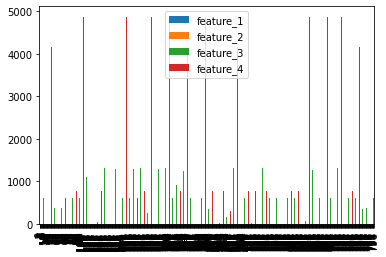

In [11]:
df.plot.bar()

<AxesSubplot:ylabel='Frequency'>

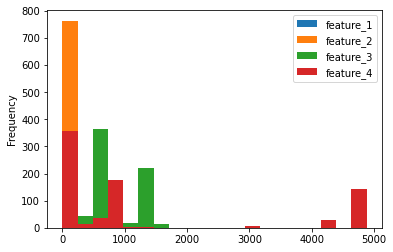

In [12]:
df.plot.hist(bins=20)


<AxesSubplot:>

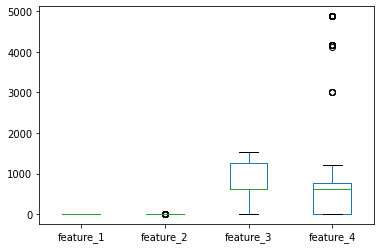

In [13]:
df.plot.box()


<AxesSubplot:xlabel='feature_1', ylabel='class'>

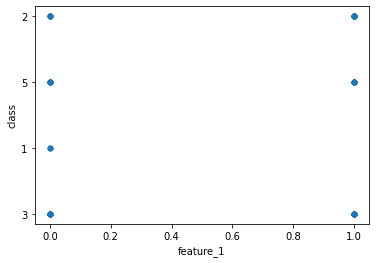

In [14]:
df.plot.scatter(x="feature_1", y="class")

<AxesSubplot:xlabel='feature_2', ylabel='class'>

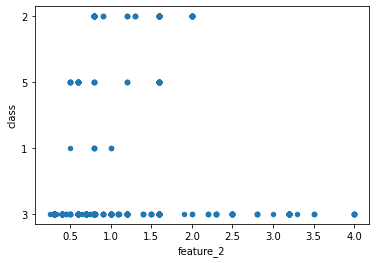

In [15]:
df.plot.scatter(x="feature_2", y="class")

<AxesSubplot:xlabel='feature_3', ylabel='class'>

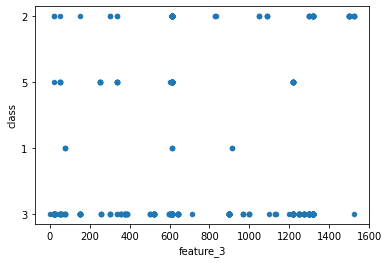

In [16]:
df.plot.scatter(x="feature_3", y="class")

<AxesSubplot:xlabel='feature_4', ylabel='class'>

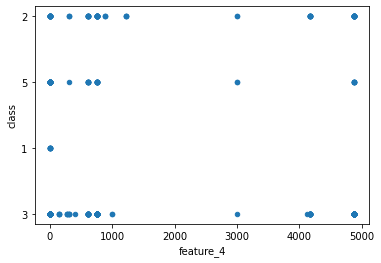

In [17]:
df.plot.scatter(x="feature_4", y="class")

In [18]:
from sklearn.model_selection import train_test_split 

In [19]:
x = pd.DataFrame(np.c_[df["feature_1"], df["feature_2"], df["feature_3"],df["feature_4"]], columns = ["feature_1","feature_2",
                                                            "feature_3","feature_4"])

In [20]:
y = pd.DataFrame(df, columns=["class"])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [22]:
from sklearn.svm import SVC

In [23]:
clf = SVC()

In [24]:
clf.fit(x_train,y_train)

SVC()

In [25]:
a = clf.predict(x_test)

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, a))

Accuracy: 0.7860262008733624


In [27]:

from sklearn.linear_model import LogisticRegression

In [28]:
l = LogisticRegression()

In [29]:
l.fit(x_train,y_train)

LogisticRegression()

In [30]:
b = l.predict(x_test)

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, b))

Accuracy: 0.7860262008733624


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
r = RandomForestClassifier()

In [34]:
r.fit(x_train,y_train)


RandomForestClassifier()

In [35]:
c = r.predict(x_test)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, c))

Accuracy: 0.8471615720524017


#z = []
for i in range(4):
    z.append(int(input("Enter "+df.columns[i])))
    
print("Class will be :",r.predict([z]))